In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
from scipy.stats import ttest_rel

# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

## Question #1

For this question use the data [at this link](https://data.ibb.gov.tr/dataset/hourly-public-transport-data-set).

1. Calculate total hourly uses of different modes of transports (RAY, KARAYOLU, DENİZ) as pandas data frames for January 2021 and May 2021. Do you see any differences in usage patterns? Explain.
2. Calculate total hourly uses of different transfer types (AKTARMA, NORMAL) as pandas data frames for June 2020 and in September 2020.
3. Plot the results for step #1 and #2.
4. Calculate the daily totals for each line, and find out the busiest lines in each day of April 2020
5. Calculate the daily totals of passenger numbers and passage numbers, then calculate the daily ratios of passage numbers by passenger numbers for August 2020. What do the numbers tell you?


In [2]:
links = {'Jan 21': 'https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/004994f5-3a50-4721-8787-41d4940bdaee/download/hourly_transportation_202101.csv',
         'May 21': 'https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/42b4a830-fee6-4765-9daf-3f3884f09b4b/download/hourly_transportation_202105.csv',
         'Jun 20': 'https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/4f1c434d-bd1f-4937-b88f-6e2df1a85dc5/download/hourly_transportation_202006.csv',
         'Sep 20': 'https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/5b3b12b7-575d-4b55-b497-62e3b544edb0/download/hourly_transportation_202009.csv',
         'Apr 20': 'https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/75e25417-36df-4822-8a18-578f0f7a584a/download/hourly_transportation_202004.csv',
         'Aug 20': 'https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/a195a42f-727a-4f1e-ad55-471306788c99/download/hourly_transportation_202008.csv'}

In [4]:
def hourlyUse(date,cat):
    data = pd.read_csv(links[date],sep=',',encoding='utf8', converters={'Date': pd.to_datetime})
    data.dropna(inplace=True)
    data['HOURS'] = data['DATE_TIME'].map(lambda x: pd.to_datetime(x).hour)
    terms = np.unique(data[cat])
    res = {}
    for x in terms:
        subset = data[data[cat]==x][['NUMBER_OF_PASSENGER','HOURS']]
        res.update({x: subset.groupby('HOURS').sum().iloc[:,0]})
    return pd.DataFrame(res)

<AxesSubplot:xlabel='HOURS'>

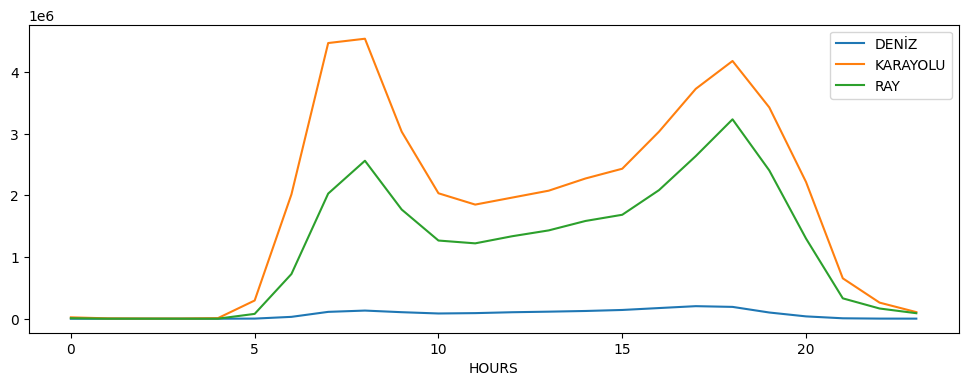

In [5]:
jan21 = hourlyUse('Jan 21','TRANSPORT_TYPE_DESC')
jan21.plot(figsize=(12,4))

<AxesSubplot:xlabel='HOURS'>

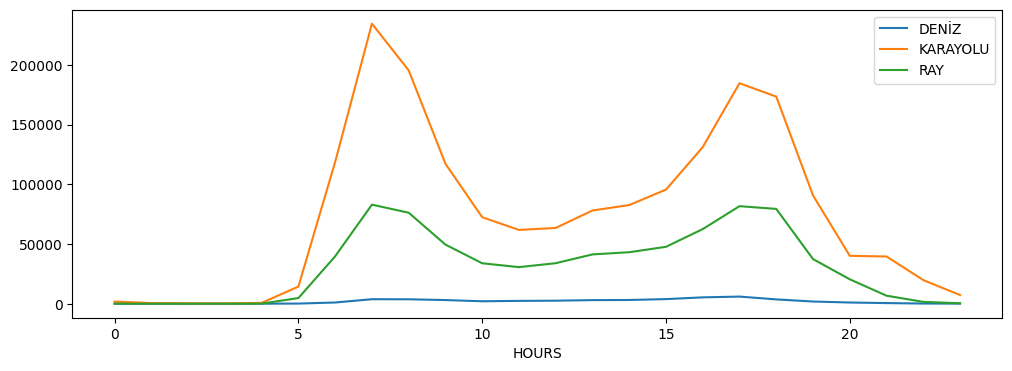

In [6]:
may21 = hourlyUse('May 21','TRANSPORT_TYPE_DESC')
may21.plot(figsize=(12,4))

<AxesSubplot:xlabel='HOURS'>

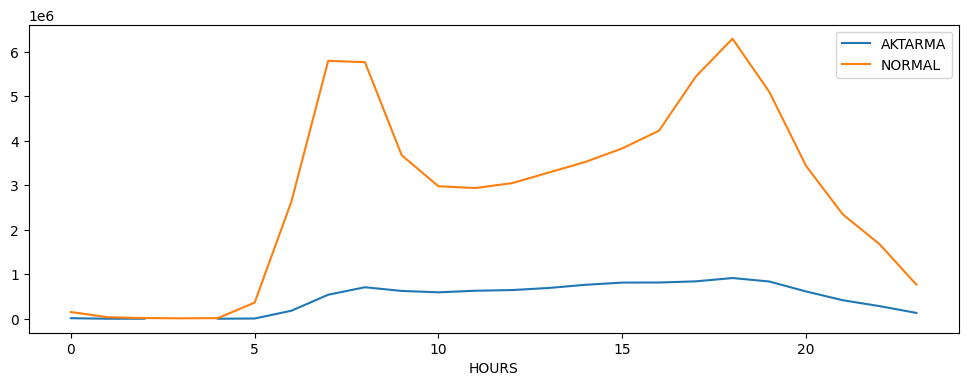

In [7]:
jun20 = hourlyUse('Jun 20','TRANSFER_TYPE')
jun20.plot(figsize=(12,4))

<AxesSubplot:xlabel='HOURS'>

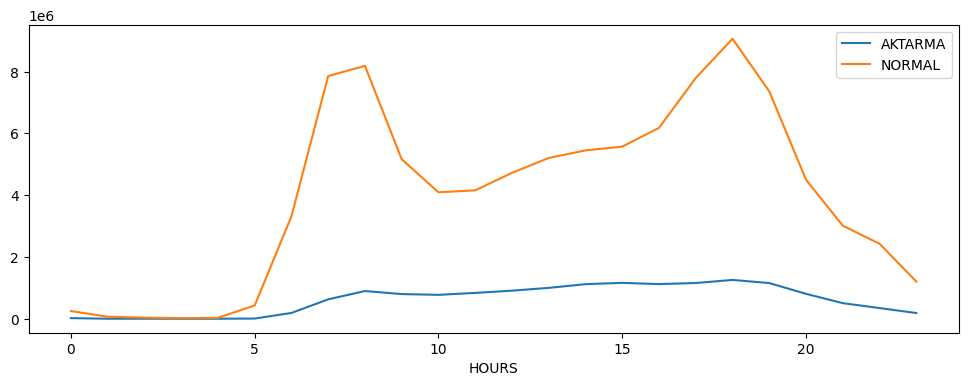

In [8]:
jun20 = hourlyUse('Sep 20','TRANSFER_TYPE')
jun20.plot(figsize=(12,4))

In [9]:
def dailyUse(date,cat):
    data = pd.read_csv(links[date],sep=',',encoding='utf8', converters={'Date': pd.to_datetime})
    data.dropna(inplace=True)
    data['DAY'] = data['DATE_TIME'].map(lambda x: pd.to_datetime(x).day)
    terms = np.unique(data[cat])
    res = {}
    for x in terms:
        subset = data[data[cat]==x][['NUMBER_OF_PASSENGER','DAY']]
        res.update({x: subset.groupby('DAY').sum().iloc[:,0]})
    return pd.DataFrame(res)

In [10]:
apr20 = dailyUse('Apr 20','LINE')
apr20

,AKSARAY-HAVALİMANI,EDİRNEKAPI-SULTANÇİFTLİĞİ,KABATAŞ-BAĞCILAR,KADIKÖY-KARTAL METROSU,KADIKÖY-MODA,KİRAZLI-OLİMPİYATKÖY,LEVENT - RUMELİ HİSARÜSTÜ,MARMARAY,METROBÜS,MOTOR TEKNE,TAKSİM-4.LEVENT,TAKSİM-KABATAŞ FUNİKULERİ,TELEFERİK EYÜP PİYERLOTİ,TELEFERİK MAÇKA - TAŞKIŞLA,ÖHO,ÜSKÜDAR ÇEKMEKÖY METROSU,İETT,İETT NOSTALJİK TRAMVAY,İETT TÜNEL,ŞEHİR HATLARI
DAY,,,,,,,,,,,,,,,,,,,,
1,62308,35099,46421,24436,124.0,14614,1115,49819,118950,9631,39829,399.0,NaN,NaN,350599,24911,165957,25.0,555.0,8368
2,56837,31928,41929,22305,117.0,13703,1121,45141,106828,8231,37294,373.0,NaN,NaN,326565,22552,153157,20.0,470.0,7451
3,60721,34183,45618,22865,124.0,13794,1071,48051,114420,8996,38707,397.0,NaN,NaN,341859,23765,159982,21.0,613.0,8845
4,42862,24189,30442,15037,41.0,9375,858,35228,81583,5394,24646,209.0,NaN,NaN,254928,16210,87172,17.0,282.0,5119
5,26354,13910,17203,8808,21.0,3662,538,21826,48672,2534,14864,102.0,NaN,NaN,161687,9468,40391,13.0,142.0,2564
6,53430,30882,44150,20761,NaN,13252,1001,50368,109094,7664,36224,NaN,NaN,NaN,326333,21325,153464,NaN,446.0,8188
7,51560,30696,41086,19668,NaN,12544,958,48827,105460,8287,33206,NaN,1.0,NaN,321206,20221,148654,NaN,459.0,7970
8,49848,29831,40572,19668,NaN,12473,999,48884,105179,8182,33022,NaN,NaN,NaN,319022,19952,149903,NaN,475.0,8360
9,50192,29700,40390,19473,NaN,12543,973,48052,104982,8341,32652,NaN,NaN,NaN,320074,19862,151318,NaN,487.0,8790


In [11]:
lines = apr20.columns
apr20.apply(lambda x: lines[x.argmax()], axis=1)

DAY
1      ÖHO
2      ÖHO
3      ÖHO
4      ÖHO
5      ÖHO
6      ÖHO
7      ÖHO
8      ÖHO
9      ÖHO
10     ÖHO
11    İETT
12    İETT
13     ÖHO
14     ÖHO
15     ÖHO
16     ÖHO
17     ÖHO
18    İETT
19    İETT
20     ÖHO
21     ÖHO
22     ÖHO
23    İETT
24    İETT
25    İETT
26    İETT
27     ÖHO
28     ÖHO
29     ÖHO
30     ÖHO
dtype: object

In [12]:
def dailyTotalUse(date):
    data = pd.read_csv(links[date],sep=',',encoding='utf8', converters={'Date': pd.to_datetime})
    data.dropna(inplace=True)
    data['DAY'] = data['DATE_TIME'].map(lambda x: pd.to_datetime(x).day)
    return data[['NUMBER_OF_PASSENGER','NUMBER_OF_PASSAGE','DAY']].groupby('DAY').sum()

In [13]:
tmp = dailyTotalUse('Aug 20')
tmp

,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
DAY,,
1,3175625,3864568
2,3353801,4051211
3,3326812,3902550
4,3388301,3645945
5,3490563,3743044
6,3495338,3742428
7,3520707,3770262
8,2984185,3240121
9,2304881,2558633


<AxesSubplot:xlabel='DAY'>

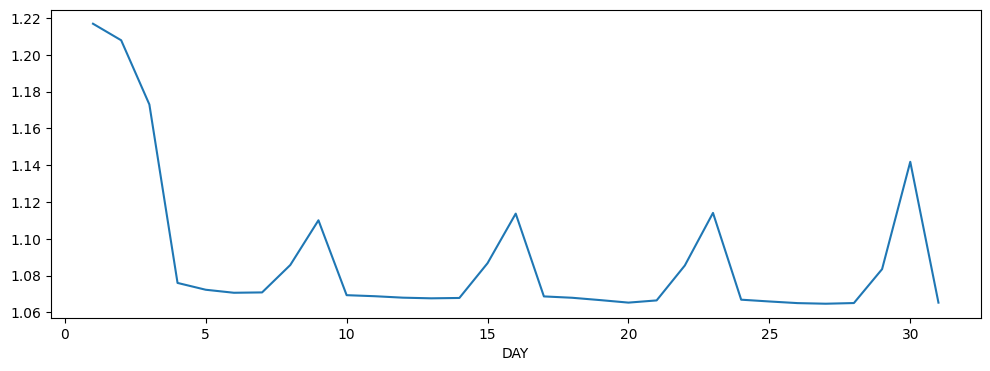

In [14]:
(tmp['NUMBER_OF_PASSAGE']/tmp['NUMBER_OF_PASSENGER']).plot(figsize=(12,4))

## Question #2

For this question use the data [at this link](https://alaska.usgs.gov/products/data.php?dataid=522). This dataset contains isotope values of muscle tissue from fish collected in the nearshore Beaufort Sea, Alaska in summers 2017-2019.

1. Calculate the average lengths of fish sampled at each location in the years 2017, 2018 and 2019.
2. Can you statistically observe any differences in lengths between the years 2018 and 2019?
3. Calculate the average concentration of C13 and N15 for the samples collected at each location in the years 2017, 2018 and 2019.
4. Can you statistically observe any differences in C13 and N15 concentrations between the years 2018 and 2019?
5. Can we do the same comparisons for the year 2017 against 2018 or 2019? Why doesn't this work? What should we do to make these comparisons to work?

In [15]:
with urlopen('https://alaska.usgs.gov/data/aquaticEcology/fish/fish_stableIsotopes_beaufort_stanek/fish_stableIsotopes_beaufort_stanek.zip') as f:
    zf = ZipFile(BytesIO(f.read()))
    fish = pd.read_csv(zf.open('fish_stableIsotopes_beaufort_stanek.csv'),
                       sep=',')

fish['Date'] = pd.to_datetime(fish['Date']).map(lambda x: x.year)
fish

,FishID,CommonName,Date,Region,Location,Latitude,Longitude,mmLength,d13C,d15N,CtoN
0,ARCI005,Arctic Cisco,2018.0,eastern,Kaktovik Lagoon,70.0907,-143.6593,323.0,-22.37,14.45,3.88
1,ARCI014,Arctic Cisco,2018.0,eastern,Kaktovik Lagoon,70.0907,-143.6593,128.0,-25.68,8.55,4.16
2,ARCI021,Arctic Cisco,2017.0,eastern,Kaktovik Lagoon,70.0907,-143.6593,48.0,-25.75,9.78,4.61
3,ARCI038,Arctic Cisco,2017.0,eastern,Kaktovik Lagoon,70.0907,-143.6593,57.0,-25.61,9.69,5.90
4,ARCI040,Arctic Cisco,2017.0,eastern,Kaktovik Lagoon,70.0907,-143.6593,79.0,-24.88,10.04,4.01
...,...,...,...,...,...,...,...,...,...,...,...
787,THST009,Threespine Stickleback,2019.0,central,Simpson Lagoon,70.5156,-149.4676,82.0,-20.51,12.93,3.88
788,THST010,Threespine Stickleback,2019.0,central,Simpson Lagoon,70.5156,-149.4676,78.0,-19.99,14.16,3.98
789,THST011,Threespine Stickleback,2019.0,central,Simpson Lagoon,70.4986,-149.5987,74.0,-20.23,13.63,3.79
790,THST012,Threespine Stickleback,2019.0,central,Simpson Lagoon,70.4986,-149.5987,82.0,-20.21,14.04,4.02


In [16]:
result = fish[['Date','Location','mmLength','d13C', 'd15N']].groupby(['Date','Location']).mean()
result

mmLength       d13C       d15N
Date   Location                                          
2017.0 Jago Lagoon       265.485714 -21.995000  13.236000
       Kaktovik Lagoon   154.469697 -20.663636  13.163030
2018.0 Jago Lagoon       275.125000 -21.835083  13.830750
       Kaktovik Lagoon   254.647727 -20.745341  14.442500
       Simpson Lagoon    202.634146 -22.200976  13.133659
       Stefansson Sound  220.860656 -22.909836  12.842951
2019.0 Jago Lagoon       299.181818 -21.864545  12.440545
       Kaktovik Lagoon   274.212121 -20.207576  13.898485
       Simpson Lagoon    217.428571 -21.727412  13.078941
       Stefansson Sound  235.557143 -21.830429  13.308857

In [17]:
def avg(year,cat):
    return fish[fish['Date']==year][['Location',cat]].groupby('Location').mean() 

In [18]:
ttest_rel(avg(2018,'mmLength'),avg(2019,'mmLength'))

Ttest_relResult(statistic=array([-8.17336142]), pvalue=array([0.0038313]))

In [19]:
ttest_rel(avg(2018,'d13C'),avg(2019,'d13C'))

Ttest_relResult(statistic=array([-2.27218168]), pvalue=array([0.10770819]))

In [20]:
ttest_rel(avg(2018,'d15N'),avg(2019,'d15N'))

Ttest_relResult(statistic=array([0.96485137]), pvalue=array([0.40579294]))